In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv(r'C:\Users\rishabh.naraniwal\Desktop\data\titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

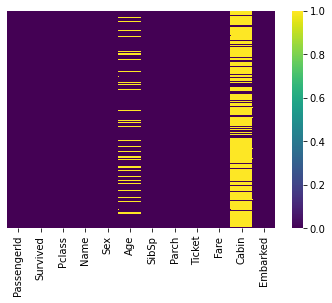

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

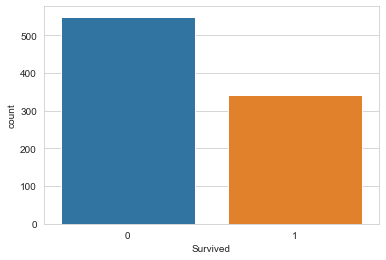

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

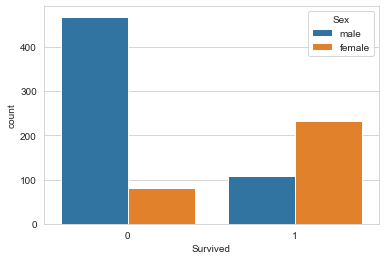

In [9]:
sns.set_style('whitegrid')

sns.countplot(x='Survived',hue='Sex',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

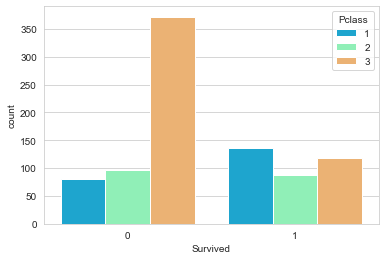

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

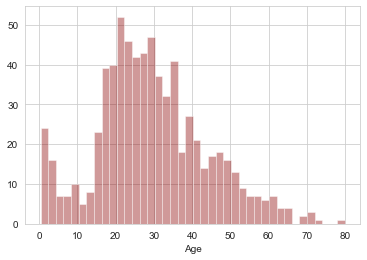

In [12]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=40)

In [28]:
df.iloc[np.where(df['Age']==33)]['Name']

85     Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...
103                           Johansson, Mr. Gustaf Joel
130                                 Drazenoic, Mr. Jozef
239                               Hunt, Mr. George Henry
285                                  Stankovic, Mr. Ivan
412                               Minahan, Miss. Daisy E
472              West, Mrs. Edwy Arthur (Ada Mary Worth)
506        Quick, Mrs. Frederick Charles (Jane Richards)
548                            Goldsmith, Mr. Frank John
719                         Johnson, Mr. Malkolm Joackim
752                     Vande Velde, Mr. Johannes Joseph
759    Rothes, the Countess. of (Lucy Noel Martha Dye...
809       Chambers, Mrs. Norman Campbell (Bertha Griggs)
872                             Carlsson, Mr. Frans Olof
881                                   Markun, Mr. Johann
Name: Name, dtype: object

<AxesSubplot:>

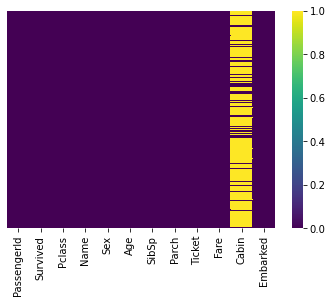

In [31]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

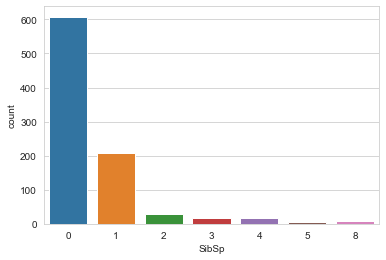

In [54]:
sns.countplot(x='SibSp',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

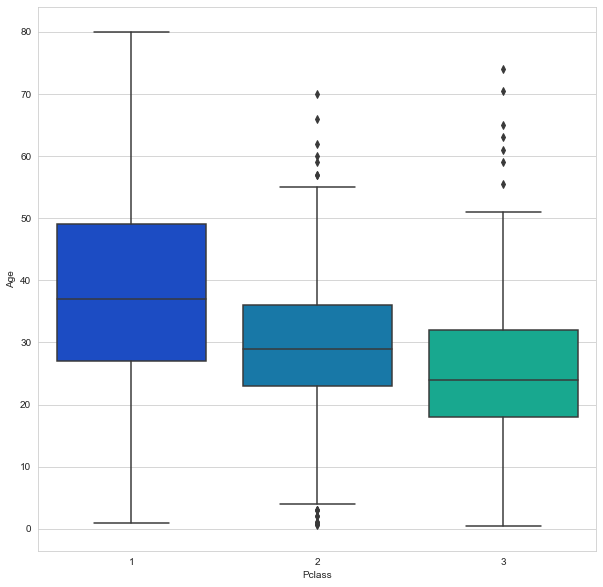

In [55]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [107]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age


In [108]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

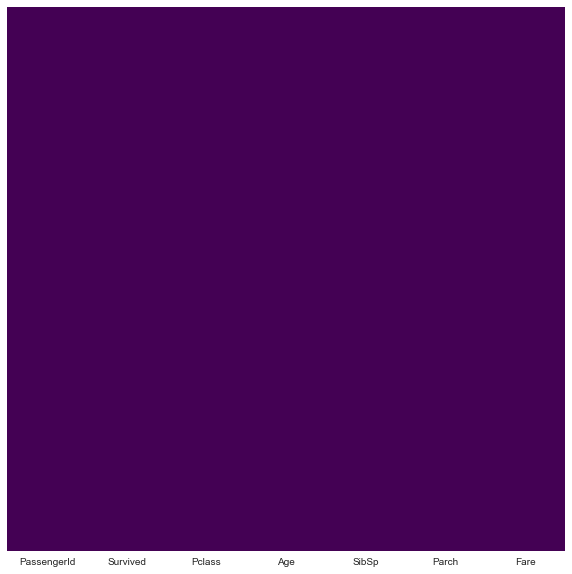

In [109]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
embark=pd.get_dummies(df['Embarked'],drop_first=True).head()


In [10]:
df.drop('Cabin',axis=1,inplace=True)

In [ ]:
##We will try to remove the features that are not necessary for our problem.

In [11]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [14]:
embark=pd.get_dummies(df['Embarked'],drop_first=True).head()


In [13]:
sex=pd.get_dummies(df['Sex'],drop_first=True).head()

In [100]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
1,2,1,1,37.0,1,0,71.2833
3,4,1,1,37.0,1,0,53.1000
6,7,0,1,37.0,0,0,51.8625
10,11,1,3,24.0,1,1,16.7000
11,12,1,1,37.0,0,0,26.5500
...,...,...,...,...,...,...,...
871,872,1,1,37.0,1,1,52.5542
872,873,0,1,37.0,0,0,5.0000
879,880,1,1,37.0,0,1,83.1583
887,888,1,1,37.0,0,0,30.0000


In [13]:
pd.concat([df,sex,embark],axis=1)

NameError: name 'sex' is not defined